In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn import tree
from sklearn.model_selection import train_test_split
import time
import lightgbm as lgb
from lightgbm import LGBMRegressor
import sklearn.metrics as metrics

In [ ]:
data=pd.read_csv('directinteractions.csv')

## *Traverse Through Data & selecting required Columns*

In [ ]:
data.head()

,Dengue viral component,Human Gene symbol,Human gene Entrez Id,Pubmed Id,Serotype,System,Experiment,Title
0,3'-UTR,CALR,811,12584332,DENV4,U937,Crosslinking followed by immunoprecipitation a...,Cellular proteins from human monocytes bind to...
1,3'-UTR,PDIA2,64714,12584332,DENV4,U937,Crosslinking followed by immunoprecipitation a...,Cellular proteins from human monocytes bind to...
2,3'-UTR,SSB,6741,12584332,DENV4,U937,Crosslinking followed by immunoprecipitation a...,Cellular proteins from human monocytes bind to...
3,3'-UTR,TIA1,7072,17502609,DENV2,BHK-21,"Co-immunoprecipitation, Western blot, Co-local...",Interaction of TIA-1/TIAR with West Nile and d...
4,3'-UTR,TIAL1,7073,17502609,DENV2,BHK-21,"Co-immunoprecipitation, Western blot, Co-local...",Interaction of TIA-1/TIAR with West Nile and d...


In [ ]:
Primary_Data=data[['Dengue viral component','Human Gene symbol',"Serotype","Title"]] #Selecting Required Columns

In [ ]:
categorcial_variables = [ 'Dengue viral component', 'Serotype']

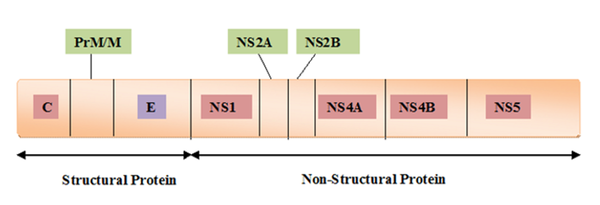

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


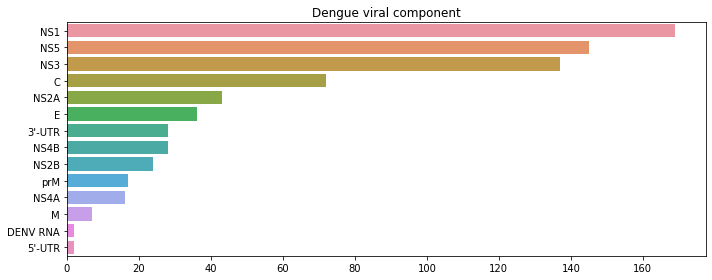

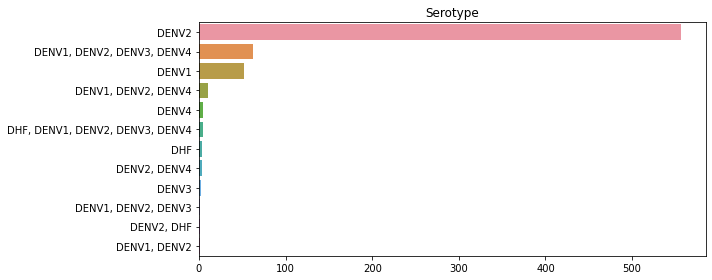

In [ ]:
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(data[col].value_counts().values, data[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

## From Graphical visualization we can see that Protein Regions of **NS1,NS3 & NS5** are more interactive with the host gene therefore we focus our analysis on these 3 regions. 
## also we can see that the most prevalent cases of dengue are of **Denv2 type** and records for other cases are almost negligible.

In [ ]:
data["Experiment"].value_counts()

Y2H assay                                                                                                                            239
Isotopic Differentiation of Interactions as Random or Targeted (I-DIRT) Immunoaffinity Purification followed by Mass spectrometry     94
Co-immunoprecipitation followed by Mass spectrometry                                                                                  63
Computational analysis                                                                                                                51
Y2H assay, Co-immunoprecipitation                                                                                                     46
                                                                                                                                    ... 
Western blot, Confocal microscopy                                                                                                      1
Co-localization, Co-immunoprecipitation, 

In [ ]:
Primary_Data["Title"].value_counts()

A physical interaction network of dengue virus and human proteins.                                                                                                  136
Quantitative proteomic analysis of host-virus interactions reveals a role for Golgi brefeldin A resistance factor 1(GBF1) in dengue infection.                       94
Dengue virus NS1 protein interacts with the ribosomal protein RPL18: This interaction is required for viraltranslation and replication in Huh-7 cells.               63
Identification of new protein interactions between dengue fever virus and its hosts, human and mosquito.                                                             50
Mapping the interactions of dengue virus NS1 protein with human liver proteins using a yeast two-hybrid system: identification of C1q as an interacting partner.     50
                                                                                                                                                                

In [ ]:
data['Human Gene symbol'].value_counts()

UBE2I      8
PTBP1      7
STAT2      6
CSNK2A1    6
PLG        5
          ..
RAC1       1
SCLT1      1
RPS27A     1
MTOR       1
CDK9       1
Name: Human Gene symbol, Length: 535, dtype: int64

In [ ]:
Primary_Data.head()


,Dengue viral component,Human Gene symbol,Serotype,Title
0,3'-UTR,CALR,DENV4,Cellular proteins from human monocytes bind to...
1,3'-UTR,PDIA2,DENV4,Cellular proteins from human monocytes bind to...
2,3'-UTR,SSB,DENV4,Cellular proteins from human monocytes bind to...
3,3'-UTR,TIA1,DENV2,Interaction of TIA-1/TIAR with West Nile and d...
4,3'-UTR,TIAL1,DENV2,Interaction of TIA-1/TIAR with West Nile and d...


# Removing Null Values 

In [ ]:
Primary_Data.isnull().sum()

Dengue viral component     0
Human Gene symbol          0
Serotype                  23
Title                      0
dtype: int64

In [ ]:
Primary_Data.shape

(726, 4)

In [ ]:
Primary_Data=Primary_Data[pd.notnull(Primary_Data['Serotype'])]

In [ ]:
Primary_Data.isnull().sum()

Dengue viral component    0
Human Gene symbol         0
Serotype                  0
Title                     0
dtype: int64

Implementing ML Model of LGBMClassifier for predicting the target serotype

In [ ]:
y = Primary_Data['Serotype'].values

In [ ]:
#X = Primary_Data.drop(columns = ['Dengue viral component','Serotype','Title'])
X=Primary_Data.drop(columns = ['Serotype','Title'])

In [ ]:
for c in X.columns:
  col_type = X[c].dtype
  if col_type == 'object' or col_type.name == 'category':
    X[c] = X[c].astype('category')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
print('length of X_train and x_test: ', len(X_train), len(X_test))
print('length of y_train and y_test: ', len(y_train), len(y_test))

length of X_train and x_test:  562 141
length of y_train and y_test:  562 141


In [ ]:

model = lgb.LGBMClassifier(loss_function= 'Logloss', custom_metric=['Accuracy','AUC'],eval_metric='F1')
model.fit(X_train, y_train, eval_set=(X_test, y_test), feature_name='auto', categorical_feature = 'auto', verbose=50)
print(); print(model)

[50]	valid_0's multi_logloss: 0.66012
[100]	valid_0's multi_logloss: 0.647264

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               custom_metric=['Accuracy', 'AUC'], eval_metric='F1',
               importance_type='split', learning_rate=0.1,
               loss_function='Logloss', max_depth=-1, min_child_samples=20,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
               n_jobs=-1, num_leaves=31, objective=None, random_state=None,
               reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


In [ ]:
expected_y  = y_test
y_pred = model.predict(X_test)

In [ ]:
print(); print(metrics.classification_report(expected_y, y_pred))
print(); print(metrics.confusion_matrix(expected_y, y_pred))


                            precision    recall  f1-score   support

                     DENV1       0.00      0.00      0.00        14
DENV1, DENV2, DENV3, DENV4       0.00      0.00      0.00         9
       DENV1, DENV2, DENV4       0.00      0.00      0.00         2
                     DENV2       0.79      1.00      0.89       112
                     DENV4       0.00      0.00      0.00         3
                       DHF       0.00      0.00      0.00         1

                  accuracy                           0.79       141
                 macro avg       0.13      0.17      0.15       141
              weighted avg       0.63      0.79      0.70       141


[[  0   0   0  14   0   0]
 [  0   0   0   9   0   0]
 [  0   0   0   2   0   0]
 [  0   0   0 112   0   0]
 [  0   0   0   3   0   0]
 [  0   0   0   1   0   0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(metrics.accuracy_score(y_test,y_pred))

0.7943262411347518


In [ ]:
expected_y  = y_test
y_pred = model.predict(X_test)

In [ ]:
print(); print(metrics.classification_report(expected_y, y_pred))
print(); print(metrics.confusion_matrix(expected_y, y_pred))


                            precision    recall  f1-score   support

                     DENV1       0.00      0.00      0.00        14
DENV1, DENV2, DENV3, DENV4       0.00      0.00      0.00         9
       DENV1, DENV2, DENV4       0.00      0.00      0.00         2
                     DENV2       0.79      1.00      0.89       112
                     DENV4       0.00      0.00      0.00         3
                       DHF       0.00      0.00      0.00         1

                  accuracy                           0.79       141
                 macro avg       0.13      0.17      0.15       141
              weighted avg       0.63      0.79      0.70       141


[[  0   0   0  14   0   0]
 [  0   0   0   9   0   0]
 [  0   0   0   2   0   0]
 [  0   0   0 112   0   0]
 [  0   0   0   3   0   0]
 [  0   0   0   1   0   0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(metrics.accuracy_score(y_test,y_pred))

0.7943262411347518


# Based on Our model Accuracy we can predict the influence with 79% Accuracy

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 89.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 80.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 93.5% of the points cannot be placed; y

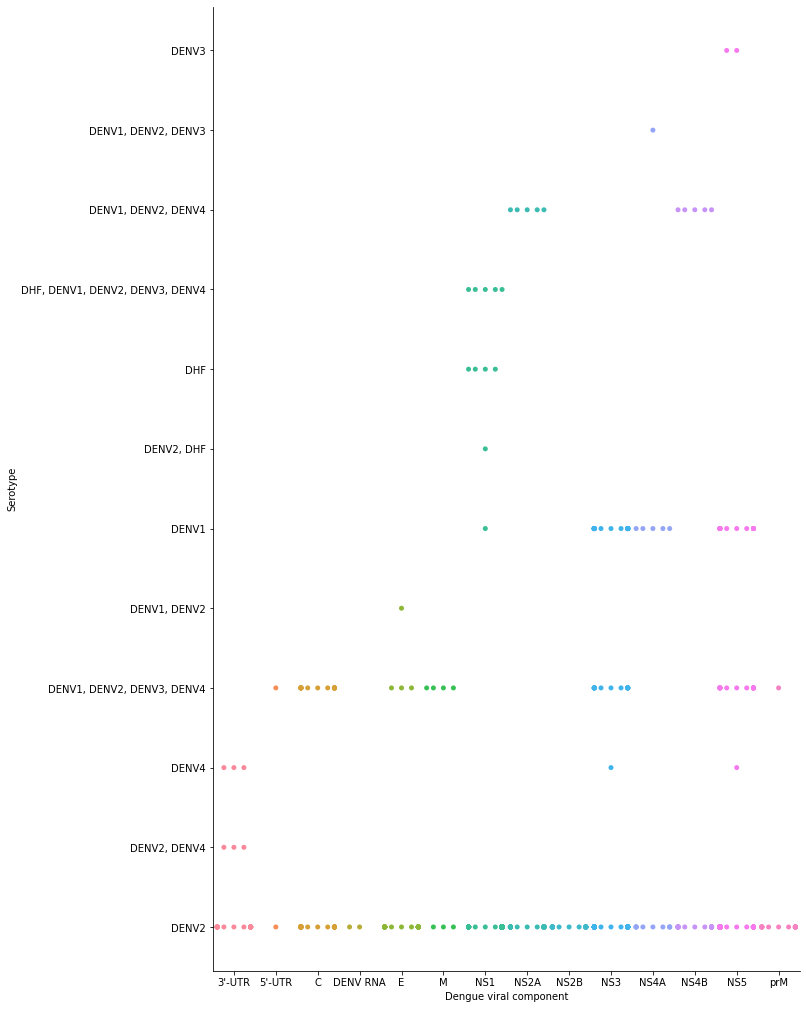

In [ ]:
g=sns.catplot(x="Dengue viral component", y="Serotype", kind="swarm", data=Primary_Data)
g.fig.set_size_inches(20,15)

### From our Model we can see that **NS3 & NS5** are the Signigicant regions of Dengue Protein Sequece that plays an important role in **DENV2 Virus Interaction**.

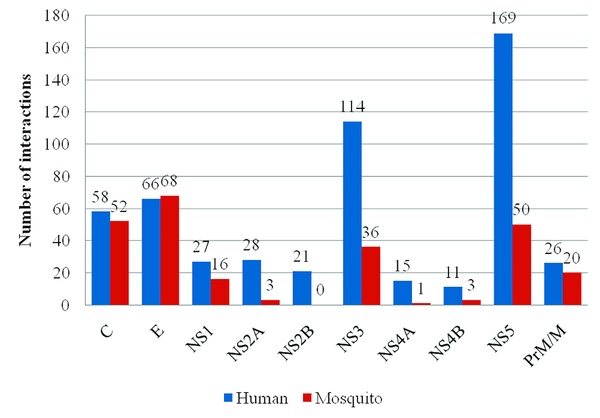

 It is evident from the figure that dengue protein NS5 and E interact with the maximum number of human proteins (169) and the maximum number of mosquito proteins (68), respectively. No interaction is identified between dengue protein NS2B and mosquito protein.

## Testing Degree Of Interaction in Human Gene

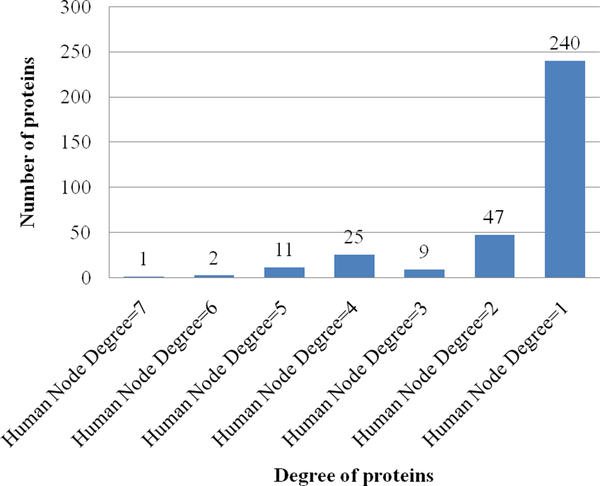

 it is noticeable that among the 335 human proteins, only 1 human protein, HBA1, has degree 7 because it interacts with 7 dengue proteins, whereas 240 human proteins interact with 1 dengue protein.

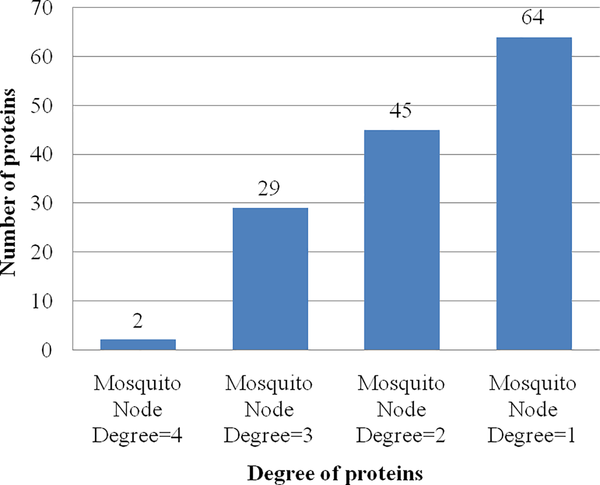

It can be noted from the figure that at mosquito node degree = 1, there is a maximum number (64) of interactions, and at human node degree = 4, there are only 2 interactions. Therefore, most of the mosquito proteins interact with 1 dengue protein, and a majority of mosquito proteins participate in a few interactions. PPI, protein–protein interactions.


## Study of Serotype

**Dengue-Human Serotype Interaction**

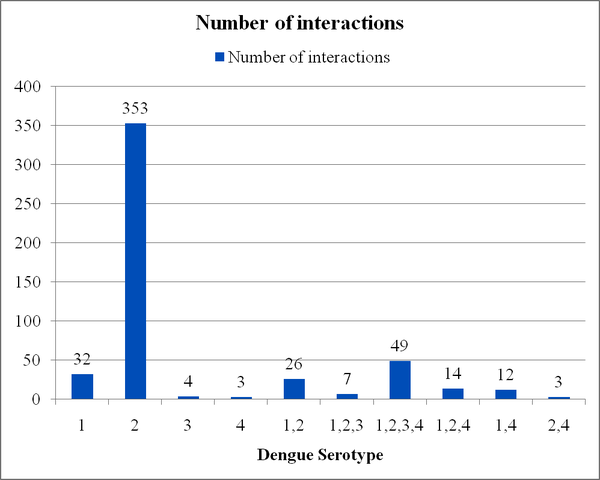

Dengue serotype 2 interacts with maximum number of human proteins 

***Dengue-Mosquito Serotype Interaction*** 

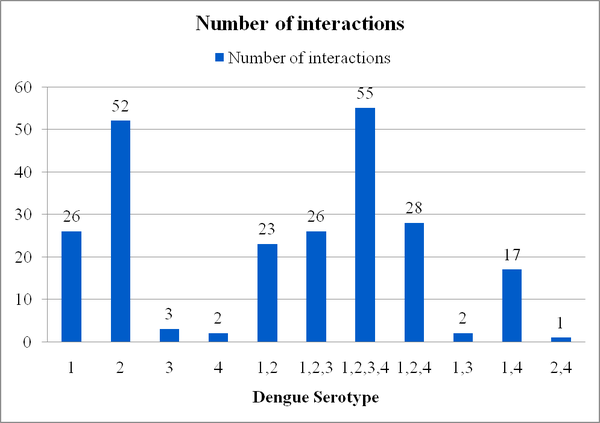

Dengue serotypes 1–4 interact with maximum number of mosquito proteins 